<a href="https://colab.research.google.com/github/kamrulkonok/UPC_ML_Project/blob/Konok/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
df = pd.read_csv("/content/drive/MyDrive/ML Project/dataset/airbnb_data.csv")
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays


# One Hot Encoding

Applying one hot encoding to `room_type`, `multi`, `biz`, `city`, `day_type` columns which contains categorical values

In [162]:
df = pd.get_dummies(
    df,
    columns=["room_type", "multi", "biz", "city", "day_type"],
    drop_first=True
)

# Convert boolean columns to integers (1 or 0)
for col in df.select_dtypes(include=[bool]).columns:
    df[col] = df[col].astype(int)


# Log Transformation

We have found from our EDA that `realSum` column has outliers due to its skewness, Therefore apply log transformation to reduce it and creating a new column `price` to store the transformed values

In [163]:
df['price'] = np.log(df['realSum'])
df.head()

,Unnamed: 0,realSum,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekends,price
0,0,194.033698,0,1,2.0,0,10.0,93.0,1,5.022964,...,0,0,0,0,0,0,0,0,0,5.268032
1,1,344.245776,0,1,4.0,0,8.0,85.0,1,0.488389,...,0,0,0,0,0,0,0,0,0,5.841356
2,2,264.101422,0,1,2.0,0,9.0,87.0,1,5.748312,...,0,0,0,0,0,0,0,0,0,5.576333
3,3,433.529398,0,1,4.0,0,9.0,90.0,2,0.384862,...,0,0,0,0,0,0,0,0,0,6.071960
4,4,485.552926,0,1,2.0,1,10.0,98.0,1,0.544738,...,0,0,0,0,0,0,0,0,0,6.185288


# Feature Scaling

Applying Min-Max Scaling to the `dist` (distance from city center) and `metro_dist` (distance from nearest metro station) columns to normalize these features into a consistent range of 0 to 1.

In [164]:
scaler = MinMaxScaler()

columns_to_scale = ['dist', 'metro_dist']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df[columns_to_scale].head())

       dist  metro_dist
0  0.198180    0.177775
1  0.018732    0.016614
2  0.226885    0.255711
3  0.014635    0.030661
4  0.020962    0.022170


Standardization is applied to the `cleanliness_rating` and `guest_satisfaction_overall` columns to ensure that these variables have zero mean and unit variance.

In [165]:
scaler = StandardScaler()

columns_to_standardize = ['cleanliness_rating', 'guest_satisfaction_overall']

df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

print(df[columns_to_standardize].head())

   cleanliness_rating  guest_satisfaction_overall
0            0.638184                    0.041559
1           -1.456366                   -0.852751
2           -0.409091                   -0.629173
3           -0.409091                   -0.293807
4            0.638184                    0.600503


In [166]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat', 'room_type_Private room', 'room_type_Shared room', 'multi_1',
       'biz_1', 'city_athens', 'city_barcelona', 'city_berlin',
       'city_budapest', 'city_lisbon', 'city_london', 'city_paris',
       'city_rome', 'city_vienna', 'day_type_weekends', 'price'],
      dtype='object')

In [167]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       feature       VIF
0                   Unnamed: 0      4.10
1                      realSum      3.60
2                  room_shared       inf
3                 room_private       inf
4              person_capacity     15.12
5            host_is_superhost      1.54
6           cleanliness_rating      2.11
7   guest_satisfaction_overall      2.18
8                     bedrooms      7.28
9                         dist     10.31
10                  metro_dist      2.94
11                  attr_index     26.33
12             attr_index_norm     25.13
13                  rest_index     21.96
14             rest_index_norm     15.67
15                         lng  98771.93
16                         lat  12804.21
17      room_type_Private room       inf
18       room_type_Shared room       inf
19                     multi_1      1.95
20                       biz_1      2.43
21                 city_athens  27205.73
22              city_barcelona    103.02
23              

# Feature Engineering

As the `bedrooms` and `person_capacity` has higher collinearity, therefore, combining them into one feature and naming it `space_index`, same logic has been applied to the `metro_to_city_dist_ratio`. Applying binning to the `dist` to make categorical value based on close, moderate and far distance assumptions

In [168]:
df['space_index'] = df['bedrooms'] * df['person_capacity']

df['metro_to_city_dist_ratio'] = df['metro_dist'] / df['dist']

bins = [0, 3, 10, float('inf')]
labels = [1, 2, 3]  # 1 for close, 2 for moderate, 3 for far
df['dist_category'] = pd.cut(df['dist'], bins=bins, labels=labels)

df['dist_category'] = pd.to_numeric(df['dist_category'])

In [169]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       feature         VIF
0                   Unnamed: 0        1.48
1                      realSum        2.09
2                  room_shared         inf
3                 room_private         inf
4              person_capacity        6.40
5            host_is_superhost        1.15
6           cleanliness_rating        2.11
7   guest_satisfaction_overall        2.18
8                     bedrooms        9.75
9                         dist        3.76
10                  metro_dist        1.84
11                  attr_index        9.71
12             attr_index_norm        8.76
13                  rest_index        8.52
14             rest_index_norm        6.00
15                         lng    62872.00
16                         lat    63369.25
17      room_type_Private room         inf
18       room_type_Shared room         inf
19                     multi_1        1.38
20                       biz_1        1.58
21                 city_athens    70726.25
22         

# Removing reduntant features

In [170]:
cols_to_drop = ['lng', 'lat', 'dist', 'metro_dist', 'room_shared', 'room_private', 'attr_index', 'rest_index', 'realSum', 'bedrooms', 'person_capacity']

df_reduced = df.drop(columns=cols_to_drop)
df_reduced.columns

Index(['Unnamed: 0', 'host_is_superhost', 'cleanliness_rating',
       'guest_satisfaction_overall', 'attr_index_norm', 'rest_index_norm',
       'room_type_Private room', 'room_type_Shared room', 'multi_1', 'biz_1',
       'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest',
       'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna',
       'day_type_weekends', 'price', 'space_index', 'metro_to_city_dist_ratio',
       'dist_category'],
      dtype='object')

The dist_category still contains higher multicollinearity 😞

In [171]:
df_reduced.replace([np.inf, -np.inf], np.nan, inplace=True)
df_reduced.dropna(inplace=True)

vif_data = pd.DataFrame()
vif_data['feature'] = df_reduced.columns
vif_data['VIF'] = [variance_inflation_factor(df_reduced.values, i) for i in range(df_reduced.shape[1])]
vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")

print(vif_data)

                       feature     VIF
0                   Unnamed: 0    1.46
1            host_is_superhost    1.15
2           cleanliness_rating    2.10
3   guest_satisfaction_overall    2.18
4              attr_index_norm    2.72
5              rest_index_norm    3.28
6       room_type_Private room    1.80
7        room_type_Shared room    1.06
8                      multi_1    1.37
9                        biz_1    1.54
10                 city_athens    5.03
11              city_barcelona    2.48
12                 city_berlin    2.34
13               city_budapest    3.94
14                 city_lisbon    4.39
15                 city_london    6.55
16                  city_paris    4.39
17                   city_rome    6.21
18                 city_vienna    3.14
19           day_type_weekends    1.01
20                       price    2.90
21                 space_index    1.42
22    metro_to_city_dist_ratio    1.00
23               dist_category  315.15


# Spiliting the data

80% for `training` and 20% for `testing`

In [172]:
X = df_reduced.drop('price', axis=1)
y = df_reduced['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (36194, 23)
Testing set shape: (15512, 23)


# Regression model

In [173]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [174]:
# Evaluate the model performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Training R^2:", train_r2)
print("Testing MSE:", test_mse)
print("Testing R^2:", test_r2)

Training MSE: 0.12135759220794774
Training R^2: 0.6564134112355475
Testing MSE: 0.1265143043871097
Testing R^2: 0.6505566783250367


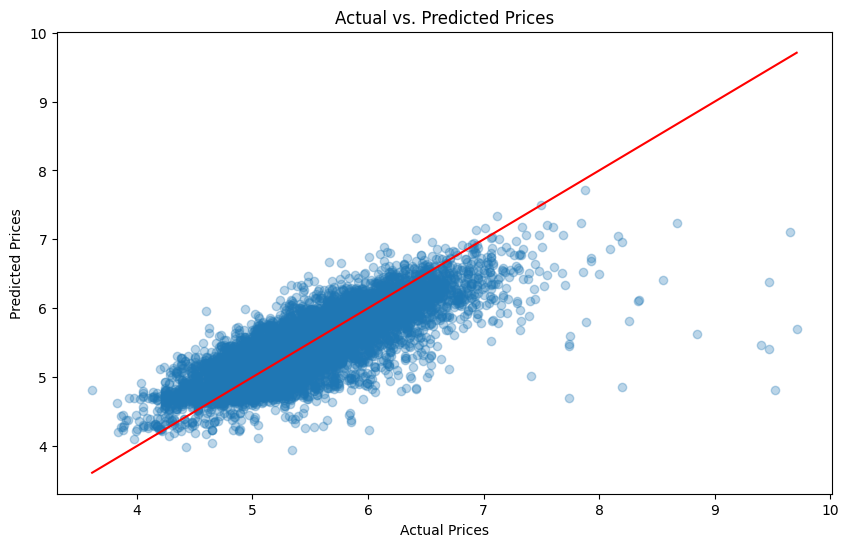

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect predictions line
plt.show()

In [175]:

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.0001)

lasso_model.fit(X_train, y_train)

y_test_pred = lasso_model.predict(X_test)

# Calculate MSE and R-squared for the testing set
mse_lasso = mean_squared_error(y_test, y_test_pred)
r2_lasso = r2_score(y_test, y_test_pred)

print("Lasso Regression - Testing MSE:", mse_lasso)
print("Lasso Regression - Testing R^2:", r2_lasso)

Lasso Regression - Testing MSE: 0.12655069656044454
Lasso Regression - Testing R^2: 0.6504561600319101


In [176]:
from sklearn.linear_model import RidgeCV

alphas = [0.001, 0.01, 0.1, 1, 10, 100]

ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)

ridge_model.fit(X_train, y_train)

y_test_pred = ridge_model.predict(X_test)

# Calculate MSE and R-squared for the testing set
mse_ridge = mean_squared_error(y_test, y_test_pred)
r2_ridge = r2_score(y_test, y_test_pred)

print("Ridge Regression - Testing MSE:", mse_ridge)
print("Ridge Regression - Testing R^2:", r2_ridge)
print("Best alpha used:", ridge_model.alpha_)

Ridge Regression - Testing MSE: 0.12665559443443922
Ridge Regression - Testing R^2: 0.6501664231384978
Best alpha used: 10.0


# Random Forest

It seems the model is overfitting in the training data, perhaps use grid search and cross validation to find the optimal parameter

In [177]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

random_forest_model.fit(X_train, y_train)

y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Calculate MSE and R-squared for the training and testing set
mse_rf_train = mean_squared_error(y_train, y_train_pred)
r2_rf_train = r2_score(y_train, y_train_pred)

mse_rf_test = mean_squared_error(y_test, y_test_pred)
r2_rf_test = r2_score(y_test, y_test_pred)

print("Random Forest Regression - Training MSE:", mse_rf_train)
print("Random Forest Regression - Training R^2:", r2_rf_train)
print("Random Forest Regression - Testing MSE:", mse_rf_test)
print("Random Forest Regression - Testing R^2:", r2_rf_test)

Random Forest Regression - Training MSE: 0.009980888330902084
Random Forest Regression - Training R^2: 0.9717421933637458
Random Forest Regression - Testing MSE: 0.07188503591547019
Random Forest Regression - Testing R^2: 0.8014473869123582


In [178]:
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror',
                         colsample_bytree = 0.3,
                         learning_rate = 0.1,
                         max_depth = 5,
                         alpha = 10,
                         n_estimators = 100)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared for the training and testing set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE: ", train_mse)
print("Training R^2: ", train_r2)
print("Testing MSE: ", test_mse)
print("Testing R^2: ", test_r2)

Training MSE:  0.1147340116619377
Training R^2:  0.675166036463235
Testing MSE:  0.12189460492043426
Testing R^2:  0.6633166830896806
